In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


IMG_SIZE = (224, 224)

best_model_path = "/kaggle/working/best_vgg16_model.h5"
model = load_model(best_model_path)

print("Best model loaded successfully!")
print("Model path:", best_model_path)


class_map = {v: k for k, v in train_gen.class_indices.items()}
print("Class Map:", class_map)


def predict_single_image(img_path):
    print("Input Image:", img_path)
   
    true_label = os.path.basename(os.path.dirname(img_path))

   
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)


    pred = model.predict(img_arr, verbose=0)
    class_index = np.argmax(pred)
    predicted_class = class_map[class_index]

   
    title_text = f"Actual: {true_label}   |   Predicted: {predicted_class}"

 
    plt.figure(figsize=(5,5))
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(title_text, fontsize=14, fontweight="bold")
    plt.show()

    
    print("Actual Class        :", true_label)
    print("Predicted Class     :", predicted_class)
    print("Class Probabilities :", pred[0])
    

Best model loaded successfully!
Model path: /kaggle/working/best_vgg16_model.h5
Class Map: {0: 'Lung_Opacity', 1: 'Normal', 2: 'Viral Pneumonia'}


Input Image: /kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Viral Pneumonia/1006.jpg


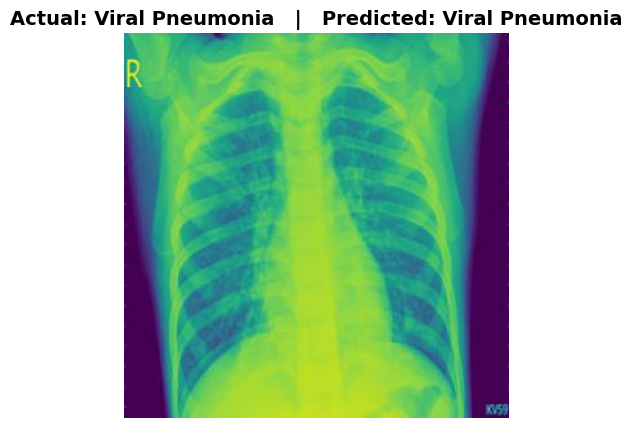

Actual Class        : Viral Pneumonia
Predicted Class     : Viral Pneumonia
Class Probabilities : [1.1588799e-08 1.0305070e-06 9.9999893e-01]


In [35]:
predict_single_image("/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Viral Pneumonia/1006.jpg")